In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.losses import sparse_categorical_crossentropy

print(tf.__version__)
print(keras.__version__)

1.8.0
2.1.6


In [3]:
 (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
train_images = x_train / 255.0
test_images = x_test / 255.0
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
 model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(350, activation=tf.nn.softmax),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 350)               274750    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3510      
Total params: 278,260
Trainable params: 278,260
Non-trainable params: 0
_________________________________________________________________


In [7]:
 model.compile(optimizer=tf.train.AdamOptimizer(),
             loss=sparse_categorical_crossentropy,
             metrics=['accuracy'])

In [8]:
model.fit(train_images, y_train, epochs=10) 

Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 1.2999 - acc: 0.7255
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.6498 - acc: 0.8040
Epoch 3/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.5095 - acc: 0.8483
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.4382 - acc: 0.8776
Epoch 5/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.3839 - acc: 0.8963
Epoch 6/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.3365 - acc: 0.9096
Epoch 7/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.3040 - acc: 0.9192
Epoch 8/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2799 - acc: 0.9254
Epoch 9/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.2619 - acc: 0.9302
Epoch 10/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.2499 - acc: 0.9325

In [9]:
model.evaluate(test_images, y_test)

10000/10000 [==============================] - 0s 47us/step


[0.26660500413775445, 0.9286]

/opt/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


3
3
3
3
3


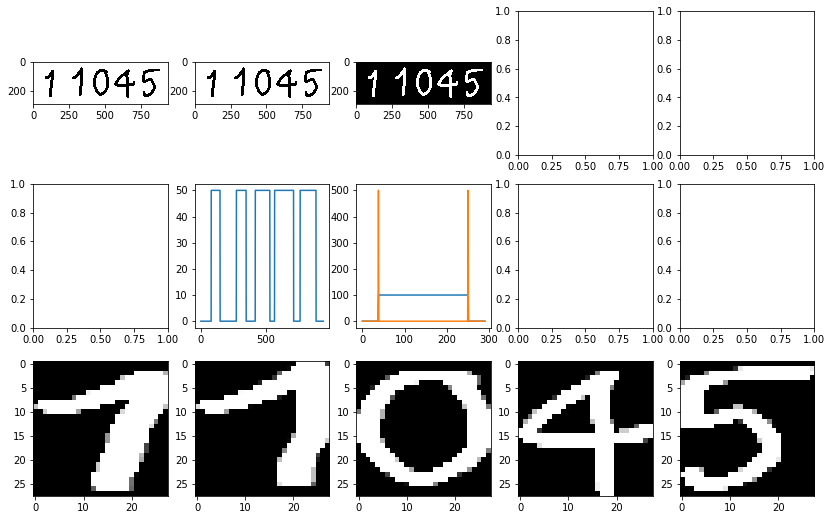

In [10]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.measure import label, regionprops

img = io.imread("number.png")
#Img28 = resize(I, (28,28), mode='constant')
gimg = ((img[:,:,0]*0.3)+(img[:,:,1]*0.6)+(img[:,:,2]*0.1)).astype(np.ubyte)
bimg = np.zeros(gimg.shape,np.ubyte)
bimg[gimg<200]=1

_hBx = np.array([ np.sum(bimg[:,i]==1) for i in range(bimg.shape[1])])
_hBx[_hBx<=0] = 0
_hBx[_hBx>0] = 50

_hBy = np.array([ np.sum(bimg[i,:]==1) for i in range(bimg.shape[0])])
_hBy[_hBy<=0] = 0
_hBy[_hBy>0] = 100

Py = label(_hBy)
Sy = np.array([ [i,np.sum(Py==i)] for i in np.unique(Py)])
Ay = np.argwhere(Py==Sy[np.argmax(Sy[1:,1])+1][0])
_hC = np.zeros(_hBy.shape[0])
_hC[[Ay[0][0],Ay[-1][0]]] = 500

Px = label(_hBx)
Sx = np.array([ [i,np.sum(Px==i)] for i in np.unique(Px)])

fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(14,9))
ax[0,0].imshow(img)
ax[0,1].imshow(gimg, cmap="gray")

ax[0,2].imshow(bimg, cmap="gray")

ax[1,1].plot(_hBx)

ax[1,2].plot(_hBy)

ax[1,2].plot(_hC)

l=0
for i in range(1,Sx.shape[0]):
    if Sx[i][1]>10:
        Ax = np.argwhere(Px==Sx[i][0])
        num = resize(bimg[int(Ay[0]):int(Ay[-1]),int(Ax[0]):int(Ax[-1])], (28,28), mode='constant')
        
        L = model.predict(num.reshape((1,28,28)))
        print(np.argmax(L))
        
        ax[2,l].imshow(num, cmap="gray")
        
        l+=1
        

plt.show()
plt.close()